In [1]:
!pip install -q pandas seaborn matplotlib scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/MoviesOnStreamingPlatforms_updated.csv"


In [9]:
df = pd.read_csv(url)
print("✅ Dataset loaded with shape:", df.shape)


✅ Dataset loaded with shape: (16744, 17)


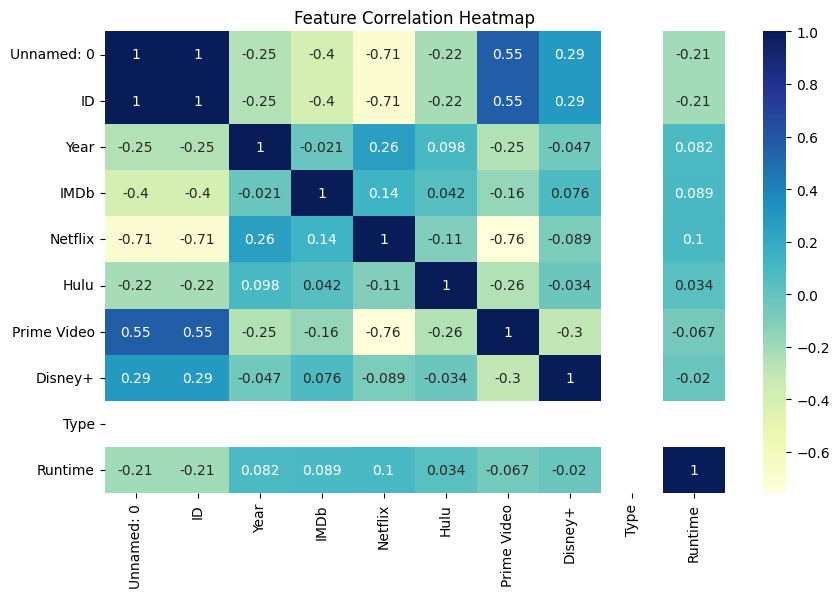

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
 #Select numeric columns only (after checking actual available columns)
selected_cols = ['Year', 'IMDb', 'Rotten Tomatoes']
df = df[selected_cols].dropna()
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '').astype(float)

X = df[['Year', 'Rotten Tomatoes']]
y = df['IMDb']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
import numpy as np
y_pred = model.predict(X_test)
print("\n📈 R^2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("📉 RMSE:", rmse)


📈 R^2 Score: 0.37075429876729726
📉 RMSE: 0.7910950503830094


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


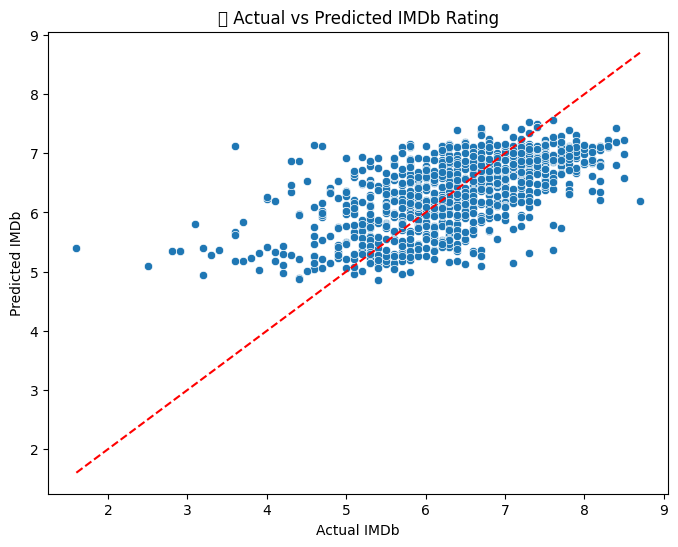

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual IMDb")
plt.ylabel("Predicted IMDb")
plt.title("🎯 Actual vs Predicted IMDb Rating")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


In [19]:
sample = pd.DataFrame([[2023, 88]], columns=X.columns)
sample_pred = model.predict(sample)[0]
print("\n🎬 Predicted IMDb rating for sample movie: {:.2f}".format(sample_pred))


🎬 Predicted IMDb rating for sample movie: 6.80
